In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Adv.csv')
df.head()

,sr,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.set_index(['sr'])

,TV,radio,newspaper,sales
sr,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [8]:
df.dtypes

sr             int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Float values.

In [9]:
df.shape

(200, 5)

In [10]:
df.isnull().sum()

sr           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values

In [11]:
df.nunique()

sr           200
TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [12]:
df.columns

Index(['sr', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

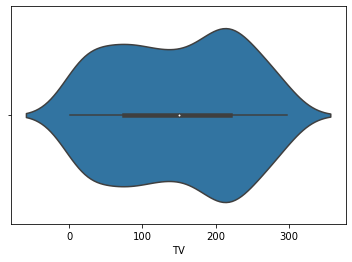

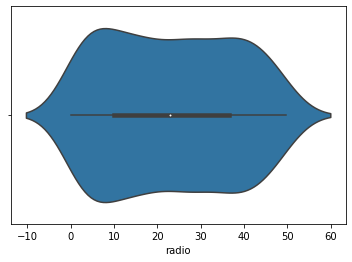

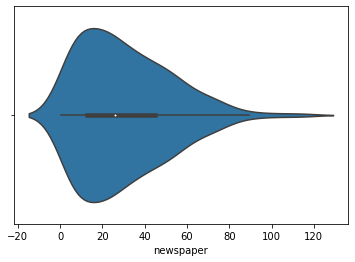

In [16]:
col = ['TV', 'radio', 'newspaper']
for i in col:
    ax = sns.violinplot(x = i, data = df)
    plt.show()

We can see that all the variables are evenly distributed, except newspaper attribute.

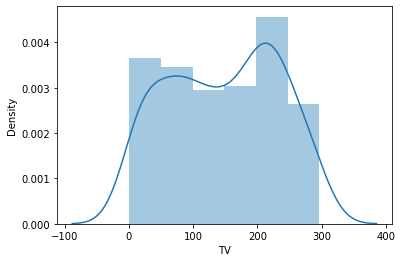

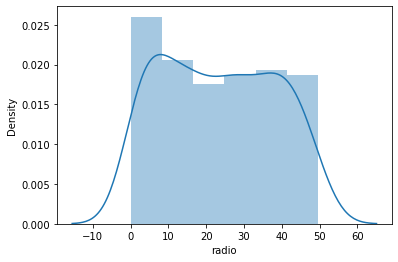

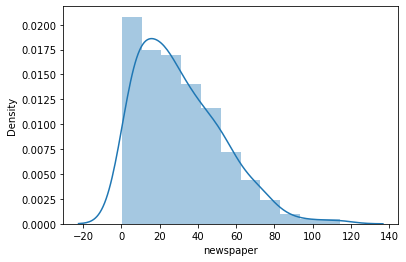

In [17]:
#Plotting distplot to check for skewness.
for i in col: 
    sb.distplot(df[i], kde = True)
    plt.show()

In [11]:
df.skew()

Index        0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

The newspaper column seems to be slightly skewed. 

 -0.5 to +0.5 being the benchmark 
    


 Describing the Dataset

In [19]:
df.describe()

,sr,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

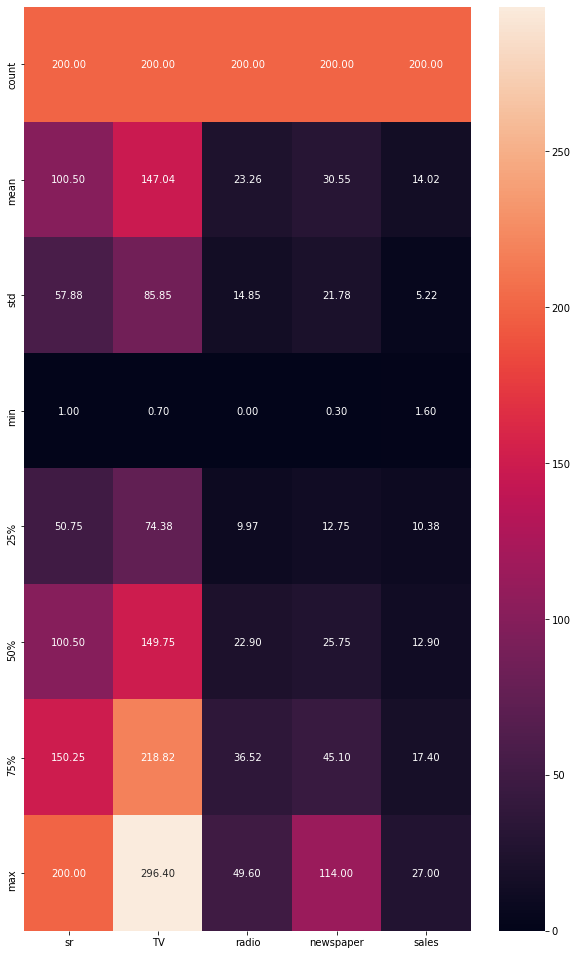

In [21]:
plt.figure(figsize = (10,17))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

Checking the correlation

In [22]:
df.corr()

,sr,TV,radio,newspaper,sales
sr,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

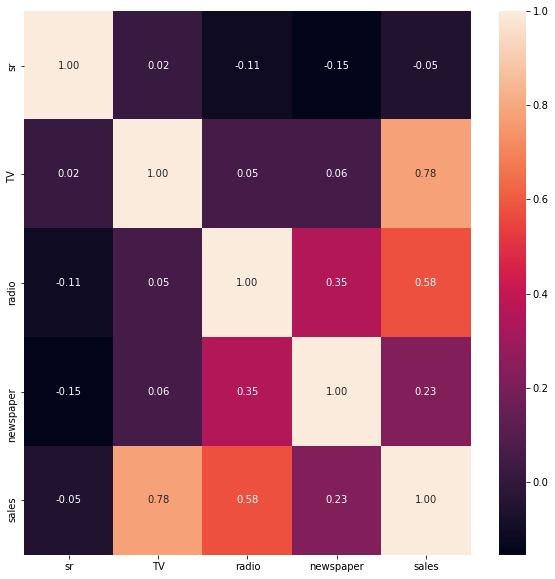

In [24]:
plt.figure(figsize = (10,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

There is a high correlation between TV and Sales, lesser correlation between radio and sales, and even lesser correlation between newspaper and sales. 

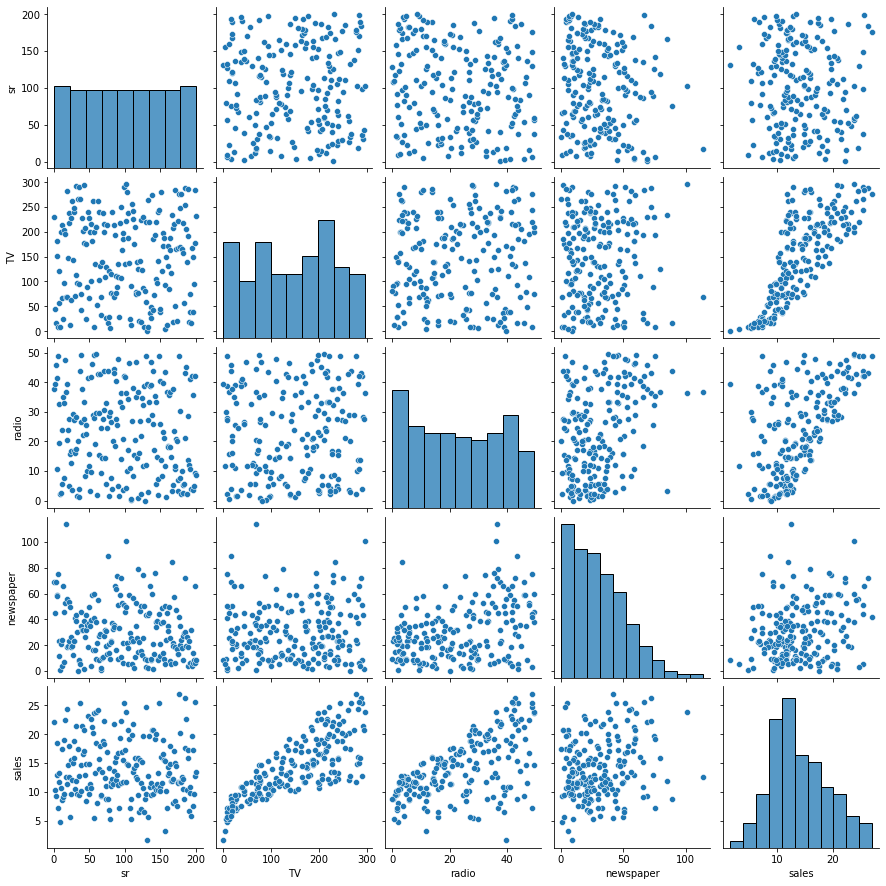

In [25]:
sb.pairplot(df)

Removing outliers

In [26]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 2
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [28]:
df_new = df[(z<3).all(axis = 1)]
df_new

,sr,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [29]:
df_new.shape

(198, 5)

<AxesSubplot:>

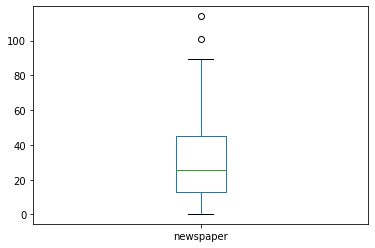

In [30]:
df['newspaper'].plot.box()

In [31]:
df = df_new

In [32]:
df.shape

(198, 5)

Splitting

In [33]:
x = df.iloc[:, 1:4]

In [34]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [35]:
y = df.iloc[:, -1]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

### Scaling the data using Min-Max scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [37]:
x = mms.fit_transform(x)

In [38]:
x.shape

(198, 3)

In [39]:
y.shape

(198,)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}')
    print('\n')

At random state 0, the training accuracy is: 0.8858699452083801
At random state 0, the testing accuracy is: 0.9068225024835147


At random state 1, the training accuracy is: 0.886089690919527
At random state 1, the testing accuracy is: 0.9057939794969586


At random state 2, the training accuracy is: 0.9137739454384091
At random state 2, the testing accuracy is: 0.8584029190210045


At random state 3, the training accuracy is: 0.9023834789281908
At random state 3, the testing accuracy is: 0.8809940152870163


At random state 4, the training accuracy is: 0.9002938768700731
At random state 4, the testing accuracy is: 0.8721688368509896


At random state 5, the training accuracy is: 0.895935137523506
At random state 5, the testing accuracy is: 0.8875354306856444


At random state 6, the training accuracy is: 0.9017449009440633
At random state 6, the testing accuracy is: 0.8796613306000014


At random state 7, the training accuracy is: 0.89222748011076
At random state 7, the testing accura

At random state 89, the training accuracy is: 0.9019819107107756
At random state 89, the testing accuracy is: 0.8747888442086135


At random state 90, the training accuracy is: 0.8781187090255373
At random state 90, the testing accuracy is: 0.9373215416328826


At random state 91, the training accuracy is: 0.9000044551122609
At random state 91, the testing accuracy is: 0.8639583701822211


At random state 92, the training accuracy is: 0.8847987303255741
At random state 92, the testing accuracy is: 0.9052244765001731


At random state 93, the training accuracy is: 0.9049270532216066
At random state 93, the testing accuracy is: 0.8681798145419224


At random state 94, the training accuracy is: 0.9048154047476872
At random state 94, the testing accuracy is: 0.8756438421063288


At random state 95, the training accuracy is: 0.9015219277302224
At random state 95, the testing accuracy is: 0.8680025686383874


At random state 96, the training accuracy is: 0.8967746737207124
At random state 96

We get the best training and testing accuracy at random state 41. 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 41)

In [44]:
x_train.shape

(138, 3)

In [45]:
x_test.shape

(60, 3)

In [46]:
y_train.shape

(138,)

In [47]:
y_test.shape

(60,)

Modelling

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [49]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [50]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred))
    print('Mean squared error: ', mean_squared_error(y_test,pred))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score: ', r2_score(y_test,pred))
    print('\n\n')

LinearRegression()
Score:  0.8936014169419066
Mean absolute error:  1.1963503738157542
Mean squared error:  3.2757953592251576
Root mean squared error:  1.8099158431333644
R2 Score:  0.8933767863464055



KNeighborsRegressor()
Score:  0.9649062930720114
Mean absolute error:  0.952333333333333
Mean squared error:  2.211513333333333
Root mean squared error:  1.4871157767078302
R2 Score:  0.9280178909913507



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  0.836666666666667
Mean squared error:  1.1733333333333333
Root mean squared error:  1.0832051206181281
R2 Score:  0.9618094059708064



SVR()
Score:  0.9297384930642448
Mean absolute error:  1.0308043376867044
Mean squared error:  2.908695771552174
Root mean squared error:  1.705489891952507
R2 Score:  0.9053254380405276



RandomForestRegressor()
Score:  0.9971018377412578
Mean absolute error:  0.5958333333333324
Mean squared error:  0.6962202333333292
Root mean squared error:  0.8343981263961042
R2 Score:  0.977338865665218

### Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    score=cross_val_score(m,x,y,cv=5)
    print('Cross val score r2 score is \n',score)
    print('Mean \n', score.mean())
    print('Std \n',score.std())
    y_pred=cross_val_predict(m,x,y,cv=5)
    print('y prediction \n',y_pred)
    print('\n\n')

LinearRegression()
Cross val score r2 score is 
 [0.87988273 0.9176965  0.92510819 0.80845813 0.89565733]
Mean 
 0.8853605756683912
Std 
 0.04165453399577511
y prediction 
 [20.74251773 12.43566375 12.50766611 17.76131421 13.37202102 12.70140393
 11.73597433 12.08818092  3.64841489 12.57442367  7.05846704 17.22006456
 10.76888821  8.77761873 18.55062714 20.95685564 23.38603216  9.94287916
 14.16397009 18.25412374 14.77536234  6.61905331 16.58509376  8.14201606
 15.62967058 14.95486716 17.07701379 19.43019207  9.23841028 21.74636006
 11.43262526  7.69558001 18.78847945  7.53065554 16.97886226 23.33683449
 15.71988358  9.969369   20.50010245 16.43595562 17.20073271 21.32896388
 13.8342759   8.91613066 15.05706368  8.84842001 21.52603698 16.17447777
  8.16065768 12.53132274  9.22568684 20.53650333 19.88736004 20.16438212
 21.22488898  8.56184073 12.66169274 21.7649737  17.94246586  5.71170002
 22.77060191 16.62921564 13.09283501 16.8828321   7.75020686  8.93574466
 11.9089931  18.77265866

RandomForestRegressor Having least differnce in the variance.

### Doing the RandomForestRegressor separately

In [53]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr = rfr.predict(x_test)

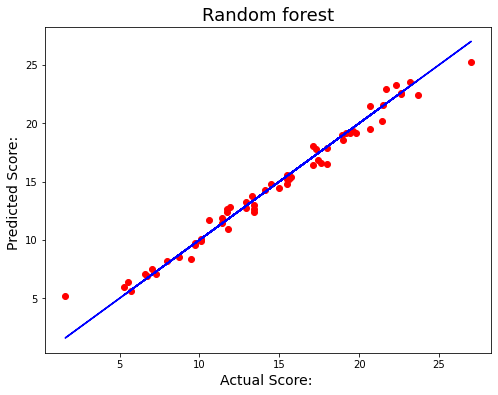

In [54]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Random forest', fontsize = 18)
plt.show()

The model looks like a good fit.

### Regularization using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
gscv = GridSearchCV(rfr, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [57]:
rfr_reg = RandomForestRegressor(criterion = 'mae', max_features = 'auto')
rfr_reg = RandomForestRegressor()
rfr_reg.fit(x_train, y_train)
rfr_reg.score(x_train, y_train)
predrfr_reg = rfr_reg.predict(x_test)
data = [predrfr_reg, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,15.034,16.573,14.714,9.751,23.207,11.72,19.425,19.171,22.579,17.844,...,12.346,10.888,13.405,18.879,11.497,8.092,14.41,10.002,7.089,18.093
Actual,15.500,18.000,15.000,9.700,22.300,10.60,19.600,19.400,22.600,18.000,...,11.700,11.800,12.900,19.200,11.400,9.500,14.10,10.100,6.600,17.100


In [58]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predrfr_reg))
print('Mean squared error: ', mean_squared_error(y_test,predrfr_reg))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predrfr_reg)))
print('\n')
print('R2 Score: ', r2_score(y_test,predrfr_reg))

Errors:


Mean absolute error:  0.6105333333333324
Mean squared error:  0.7098423666666623
Root mean squared error:  0.8425214339508891


R2 Score:  0.97689548154822


We're getting a model accuracy of 97.6%.

### Saving the model

In [60]:
import joblib
joblib.dump(rfr_reg, 'Adv.obj')

['Adv.obj']

### Conclsion

In [62]:
final = joblib.load('Adv.obj')
final.predict(x_train)

array([10.725, 13.326, 12.63 , 11.991, 25.634, 12.342,  8.605,  4.025,
       16.288,  7.107,  8.944, 12.796, 24.968, 11.558, 20.122, 15.193,
        6.264,  9.187,  7.077,  8.237, 16.01 , 14.062, 12.861, 14.999,
       16.615, 21.103, 14.868, 11.477, 14.588,  5.006, 13.693, 10.33 ,
        7.825,  7.288,  9.555, 11.86 , 19.199,  9.554, 10.533, 11.889,
       18.567, 10.926, 12.294, 10.615, 11.049, 23.556, 23.516,  8.747,
       15.537, 13.202, 11.703, 10.544, 10.428, 25.322, 14.265, 21.953,
       12.898, 24.358, 11.379,  6.539, 12.11 , 11.624, 12.701, 11.942,
       24.384, 11.02 , 12.197, 17.119, 18.521, 10.364,  9.571, 13.004,
        5.364,  9.588, 18.363, 15.109, 14.871, 20.537, 14.436, 14.838,
       11.717, 13.98 ,  7.291, 21.89 ,  9.889, 10.328, 16.855, 11.125,
        8.808, 18.444, 20.429,  8.687,  9.874, 16.06 , 11.823,  6.057,
        9.673, 17.267,  9.948, 16.414,  8.91 ,  7.219, 15.771, 10.57 ,
       15.84 , 12.47 ,  8.812, 14.319, 12.376,  8.256, 13.327, 12.156,
      

In [107]:
conclusion = pd.DataFrame([final.predict(x_test)[:], predrfr_reg[:]], index = ['Predicted', 'Original'])

In [108]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,15.286,16.571,14.493,9.862,23.305,11.77,19.244,19.13,22.54,17.716,...,12.373,10.854,13.177,18.752,11.304,8.503,14.321,10.058,7.055,17.981
Original,15.286,16.571,14.493,9.862,23.305,11.77,19.244,19.13,22.54,17.716,...,12.373,10.854,13.177,18.752,11.304,8.503,14.321,10.058,7.055,17.981
